✅ TensorFlow version: 2.20.0
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 58s 0us/step
📂 CIFAR-10 dataset downloaded and saved in: ./data


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🚀 Training MLP...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.3186 - loss: 1.9548 - val_accuracy: 0.3385 - val_loss: 1.8126
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3847 - loss: 1.7242 - val_accuracy: 0.3944 - val_loss: 1.6889
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4133 - loss: 1.6495 - val_accuracy: 0.4278 - val_loss: 1.6326
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4355 - loss: 1.6001 - val_accuracy: 0.4377 - val_loss: 1.5944
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4478 - loss: 1.5585 - val_accuracy: 0.4450 - val_loss: 1.5821
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4578 - loss: 1.5332 - val_accuracy: 0.4156 - val_loss: 1.6420
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4661 - loss: 1.5062 - val_accuracy: 0.4611 - val_loss: 1.5373
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4775 - l

C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.4788 - loss: 1.4544 - val_accuracy: 0.5873 - val_loss: 1.1663
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6224 - loss: 1.0772 - val_accuracy: 0.6301 - val_loss: 1.0546
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.6707 - loss: 0.9426 - val_accuracy: 0.6735 - val_loss: 0.9392
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7090 - loss: 0.8383 - val_accuracy: 0.6791 - val_loss: 0.9171
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7394 - loss: 0.7518 - val_accuracy: 0.6887 - val_loss: 0.8859
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7629 - loss: 0.6797 - val_accuracy: 0.7067 - val_loss: 0.8640
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7902 - loss: 0.6002 - val_accuracy: 0.7112 - val_loss: 0.8645
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8148 - loss: 0.5295 -

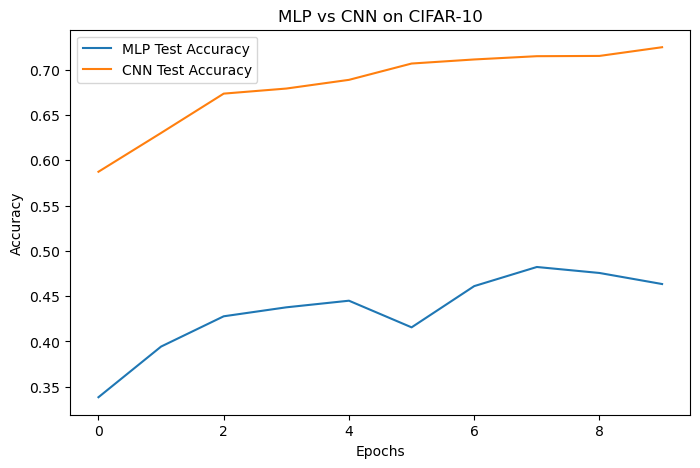


✅ Final MLP Test Accuracy: 46.34%
✅ Final CNN Test Accuracy: 72.47%
📂 Dataset saved in folder: C:\Users\Siddhant Gite\Untitled Folder\data


In [1]:
# ------------------------------------------------------------
# CIFAR-10 Neural Network Comparison (TensorFlow)
# ------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Load CIFAR-10 Dataset (Download to ./data)
# ------------------------------------------------------------
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
np.savez(os.path.join(data_dir, "cifar10_data.npz"),
         X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print(f"📂 CIFAR-10 dataset downloaded and saved in: {data_dir}")

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# ------------------------------------------------------------
# Step 2: Define MLP Model
# ------------------------------------------------------------
def create_mlp():
    model = keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------------------------------------
# Step 3: Define CNN Model
# ------------------------------------------------------------
def create_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------------------------------------
# Step 4: Train and Evaluate Models
# ------------------------------------------------------------
num_epochs = 10
batch_size = 128

mlp = create_mlp()
print("\n🚀 Training MLP...")
mlp_history = mlp.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_test, y_test), verbose=1)

cnn = create_cnn()
print("\n🚀 Training CNN...")
cnn_history = cnn.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_test, y_test), verbose=1)

# ------------------------------------------------------------
# Step 5: Plot Accuracy Comparison
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(mlp_history.history['val_accuracy'], label='MLP Test Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP vs CNN on CIFAR-10")
plt.legend()
plt.show()

# ------------------------------------------------------------
# Step 6: Final Evaluation
# ------------------------------------------------------------
mlp_test_loss, mlp_test_acc = mlp.evaluate(X_test, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final MLP Test Accuracy: {mlp_test_acc:.2%}")
print(f"✅ Final CNN Test Accuracy: {cnn_test_acc:.2%}")
print(f"📂 Dataset saved in folder: {os.path.abspath(data_dir)}")
